# AIML Reference-Unsupervised Learning/Clustering

- <a href = #link_Analysis>Cluster Analysis</a>
- <a href = #link_KMeans>KMeans Clustering</a>
- <a href = #link_Hierarchical>Hierarchical Clustering</a>
    - <a href = #link_problem3>Problem 3</a>
- <a href = #link_PCA>PCA</a>


# <a id = "link_Analysis"></a>Cluster Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
tech_supp_df = pd.read_csv("technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [3]:
cardata = pd.read_csv("cars.csv")
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
tech_supp_df.shape

(23, 8)

In [5]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [6]:
techSuppAttr=tech_supp_df.iloc[:,1:]

In [7]:
# Hierrachical clustering sample
custData = pd.read_csv("Cust_Spend_Data.csv") 
custData.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
mydata = pd.read_csv("Depression.csv")

In [9]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [10]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

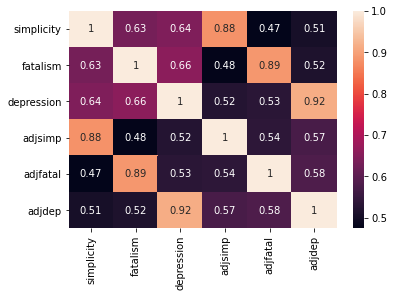

In [11]:
corr = mydata.corr()
sns.heatmap(corr, annot = True)

In [12]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [13]:
mydata.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)

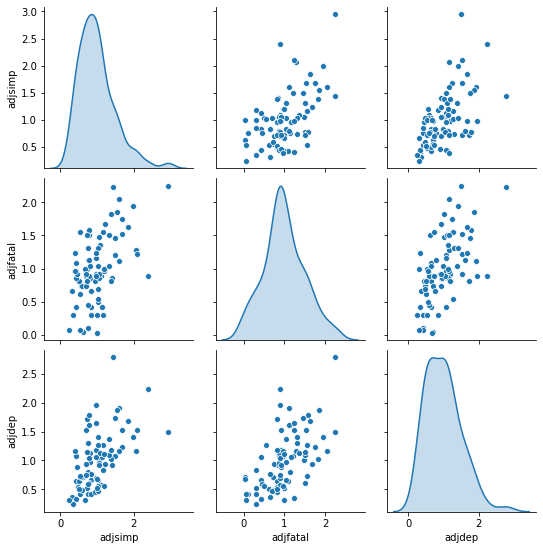

In [14]:
sns.pairplot(mydata, diag_kind='kde') 

In [15]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [16]:
mydata_z = mydata.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

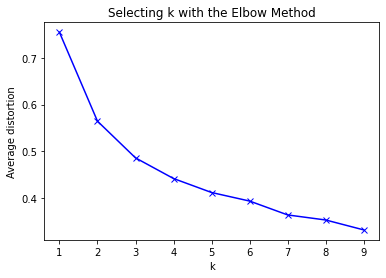

In [17]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [18]:
cardata.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
# Check for missing value
cardata.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [20]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
cardata[cardata['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [21]:
cardata.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

#### HP has non numeric values. This has to be corrected

In [22]:
cardata['hp'].replace("?",np.nan, inplace=True)

In [23]:
# Since this does not look to be normally distributed, let us impute by using median
cardata['hp'].fillna((cardata['hp'].median()), inplace=True)
cardata['hp'] = cardata['hp'].astype('float')

In [24]:
cardata.corr(method='kendall')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.686477,-0.679847,-0.673377,-0.694006,0.301096,0.413661,0.467249
cyl,-0.686477,1.000000,0.794854,0.682006,0.735481,-0.367194,-0.273742,-0.551610
disp,-0.679847,0.794854,1.000000,0.711556,0.800508,-0.352110,-0.218920,-0.570074
hp,-0.673377,0.682006,0.711556,1.000000,0.696368,-0.482267,-0.274888,-0.402494
wt,-0.694006,0.735481,0.800508,0.696368,1.000000,-0.268619,-0.196863,-0.496185
acc,0.301096,-0.367194,-0.352110,-0.482267,-0.268619,1.000000,0.196024,0.173055
yr,0.413661,-0.273742,-0.218920,-0.274888,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.402494,-0.496185,0.173055,0.136967,1.000000


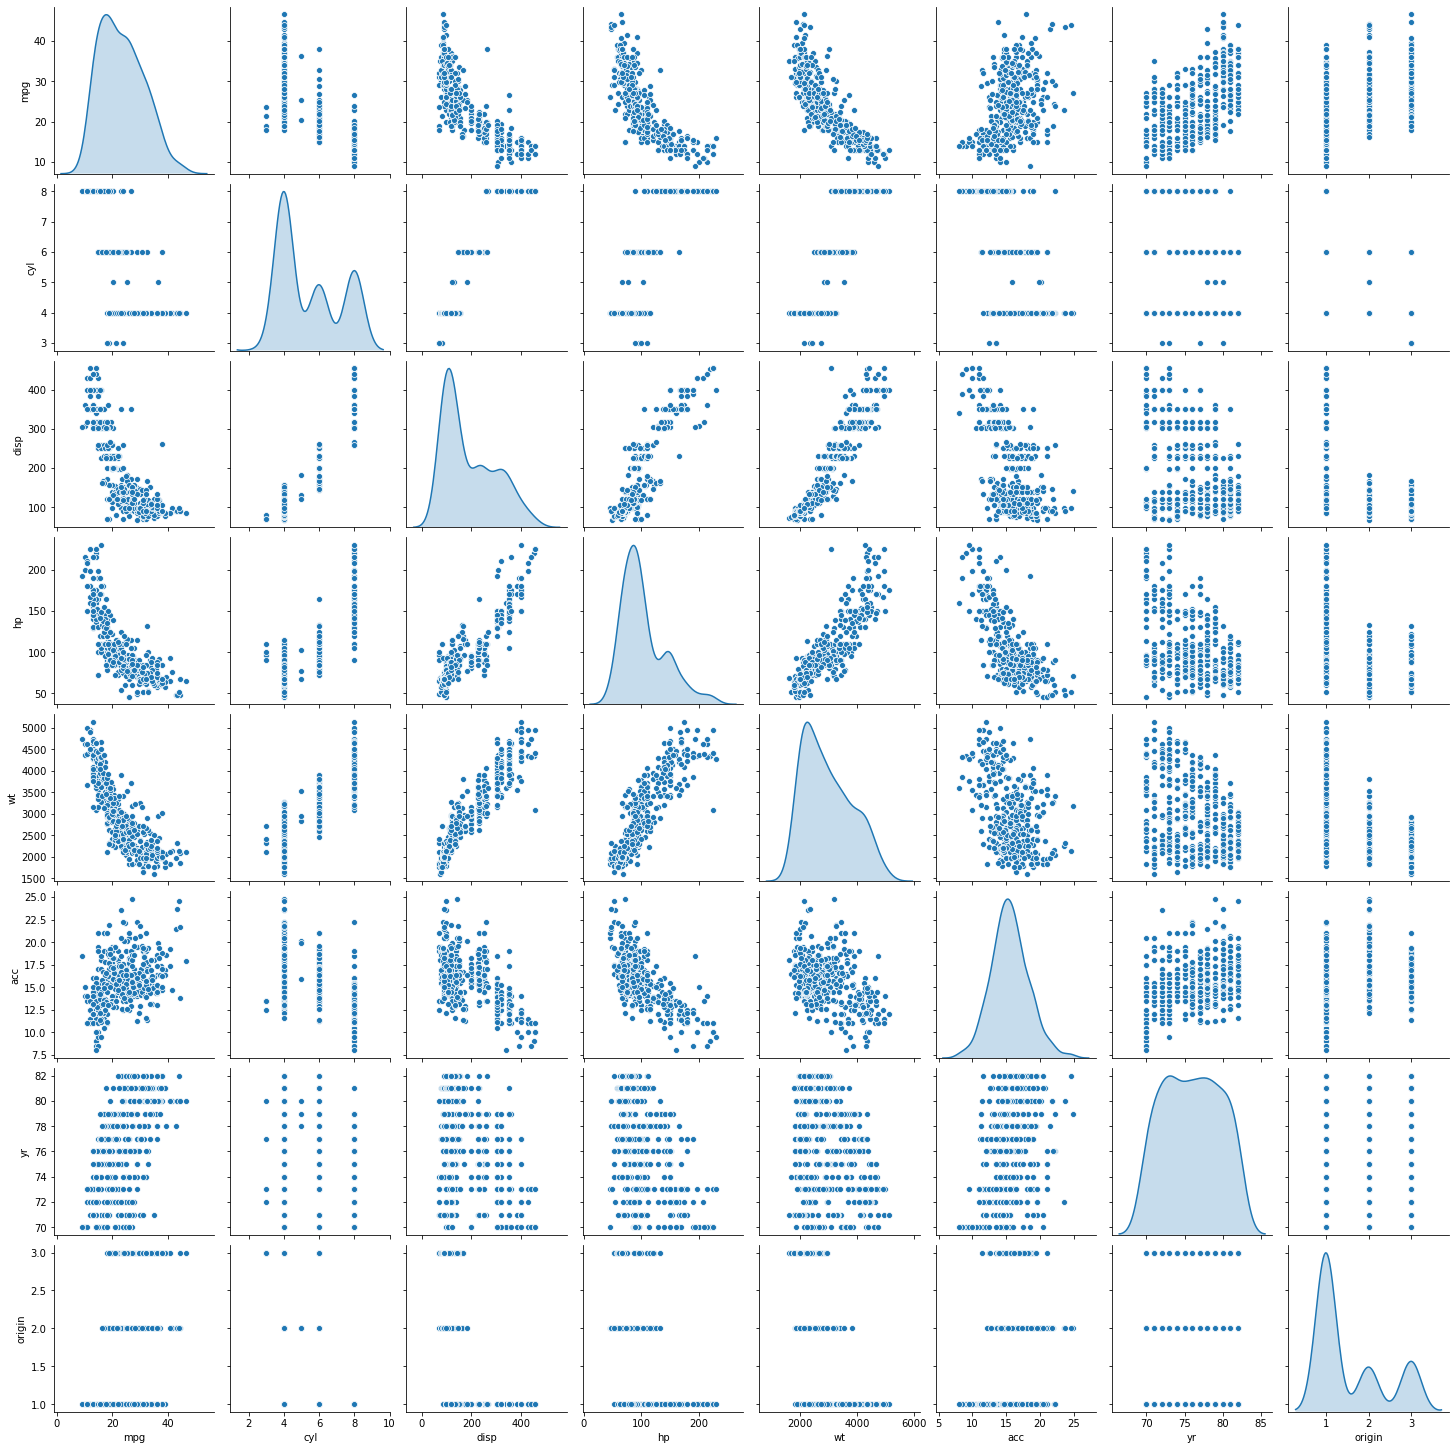

In [25]:
sns.pairplot(cardata,diag_kind='kde')

In [26]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl and disp shows 3 clusters while wt shows 2

# from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
# (correlation too gives high negative correlation)
# Cyl too shows negative correlation with levels

In [27]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(cardata['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
cardata = cardata.join(one_hot)
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0,0


In [28]:
# Let us now remove duplicate/irrelevant columns
cars_new = cardata.drop(['yr','origin','car_name'], axis =1)
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0


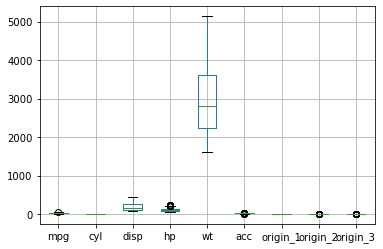

In [29]:
cars_new.boxplot()

#### Scale the data

In [30]:
techSuppScaled=techSuppAttr.apply(zscore)

In [31]:
cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)

In [32]:
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1,0,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1,0,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1,0,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1,0,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1,0,0


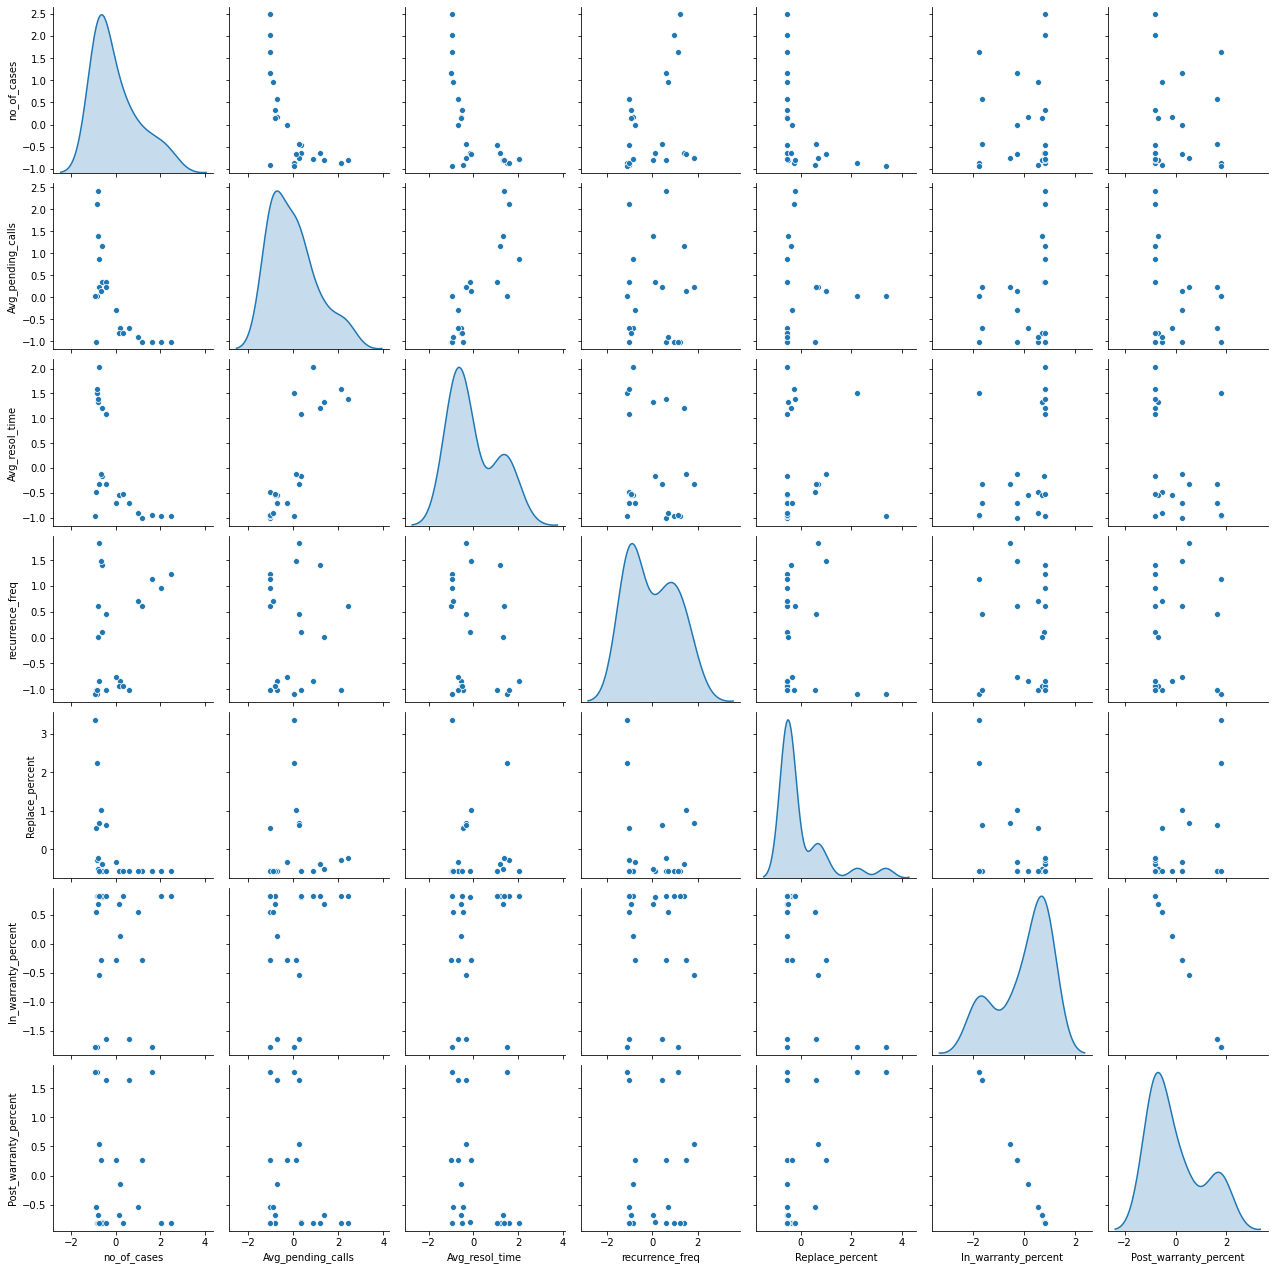

In [33]:
sns.pairplot(techSuppScaled,diag_kind='kde')

# <a id = "link_KMeans"></a>KMeans Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

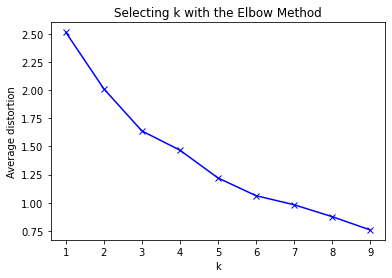

In [34]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [35]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2602.226131
1,2,1130.136302
2,3,771.033842
3,4,645.947120
4,5,568.253120
5,6,510.340095
6,7,468.659412
7,8,422.233746
8,9,388.940333
9,10,363.466105


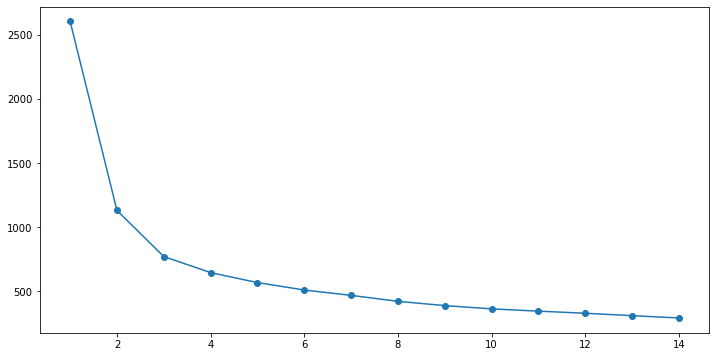

In [36]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

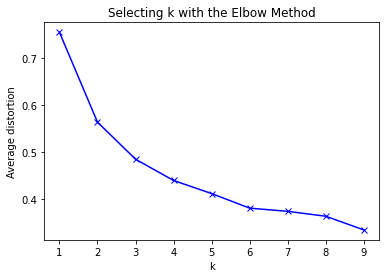

In [37]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [38]:
#Set the value of k=6
kmeans_dep = KMeans(n_clusters=6, n_init = 15, random_state=12)

In [39]:
kmeans_dep.fit(mydata_z)

KMeans(n_clusters=6, n_init=15, random_state=12)

In [40]:
centroids = kmeans_dep.cluster_centers_

In [41]:
centroids

array([[-0.88088103, -0.11405139, -0.66754047],
       [ 1.85002892,  1.17163038,  1.52598085],
       [-0.24839937,  0.34794469,  1.10608926],
       [ 0.66688667,  1.2013664 ,  0.2091591 ],
       [-0.48912058, -1.43939641, -0.98777062],
       [ 0.08693443, -0.27253233, -0.11070444]])

In [42]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [43]:
centroid_df.head()

,adjsimp,adjfatal,adjdep
0,-0.880881,-0.114051,-0.667540
1,1.850029,1.171630,1.525981
2,-0.248399,0.347945,1.106089
3,0.666887,1.201366,0.209159
4,-0.489121,-1.439396,-0.987771


In [45]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans_dep.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [46]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [47]:
df_labeled.head(10)

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,4
1,0.72717,0.99915,0.51688,0
2,0.62176,0.03811,0.70699,4
3,0.83522,0.42218,0.65639,4
4,0.47697,0.81423,0.53518,0
5,0.40664,1.23261,0.34042,0
6,0.84556,0.29789,0.42168,4
7,1.49961,1.20366,1.08127,3
8,0.31082,0.65651,0.36337,0
9,1.40836,0.85391,0.91711,5


In [48]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis.head(10)

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,4
1,0.72717,0.99915,0.51688,0
2,0.62176,0.03811,0.70699,4
3,0.83522,0.42218,0.65639,4
4,0.47697,0.81423,0.53518,0
5,0.40664,1.23261,0.34042,0
6,0.84556,0.29789,0.42168,4
7,1.49961,1.20366,1.08127,3
8,0.31082,0.65651,0.36337,0
9,1.40836,0.85391,0.91711,5


In [49]:
df_labeled['labels'].value_counts()  

0    21
5    17
4    14
1    11
2    10
3     9
Name: labels, dtype: int64

In [50]:
# We could see the bend at 4, so let us create 4 custers
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12)
kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12)

In [51]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[127  97  90  84]


In [52]:
# Distribution looks fine.
# let us check the centers in each group
centroids_cars = kmeans.cluster_centers_
centroid_df_cars = pd.DataFrame(centroids_cars, columns = list(cars_new) )
centroid_df_cars.transpose()

,0,1,2,3
mpg,0.301649,-1.151105e+00,1.281735,-0.500100
cyl,-0.786798,1.486055e+00,-0.836700,0.369988
disp,-0.689917,1.484507e+00,-0.931165,0.326513
hp,-0.386251,1.506241e+00,-0.963516,-0.123037
wt,-0.599290,1.387534e+00,-0.988863,0.363294
acc,-0.108202,-1.062679e+00,0.842230,0.488343
origin_1,0.456693,1.000000e+00,0.177778,0.928571
origin_2,0.314961,-2.775558e-16,0.277778,0.059524
origin_3,0.228346,1.110223e-16,0.544444,0.011905


In [53]:
# Group 1 has highest values for mpg while 3rd has lowest
# Group 0 has max no of cylinders and 2 forms of lower cylinder values
# As seen in correlation and pairplot, Group 0 has highest values for hp,wt and displ
# Group 1 seems to be comprising of newest cars
# Group 3 and 0 seems to be originated at point 3, while 2 in 2nd point and 1 again at point 3

In [54]:
# Add cluster number to original cars data

predictions = kmeans.predict(cars_new)
predictions
cardata["group"] = predictions
cardata['group'] = cardata['group'].astype('category')
cardata.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
car_name      object
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

In [55]:
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,origin_1,origin_2,origin_3,group
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC56F698B0>,
      dtype=object)

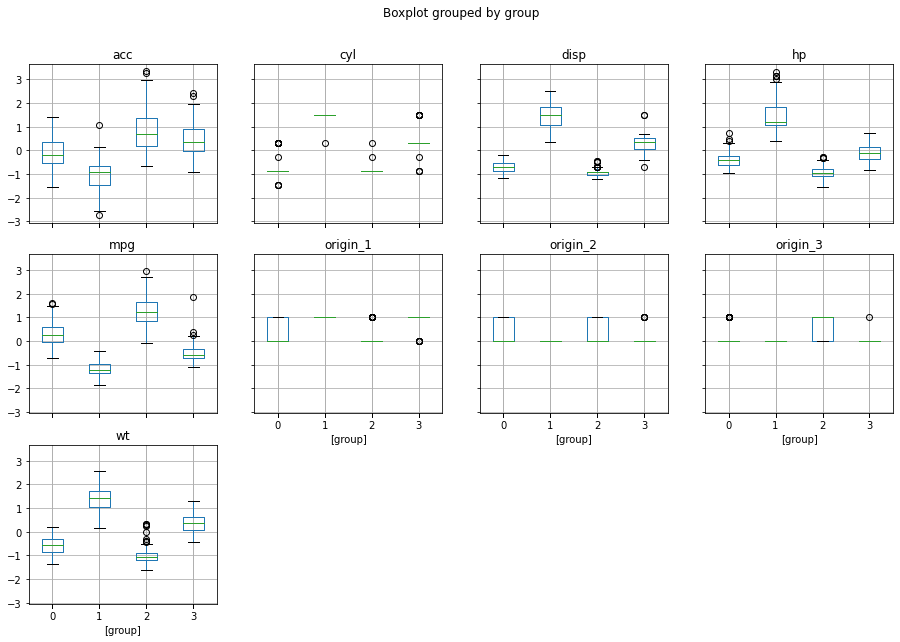

In [56]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [57]:
# Group 0 is characterised by lower acc, comparitely old models, higher wt, hp but lowest mpg with origin at 1
# Group 1 -Highest mpg, lower wt and hp. Lower age limits suggest comparitevly newer cars. Origin looks more 2
# Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration
# Group 3 - Again slighlty higher in wt origin code as 1. Better performance in terms of mpg

In [58]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [59]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
2,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC57AF30D0>,
      dtype=object)

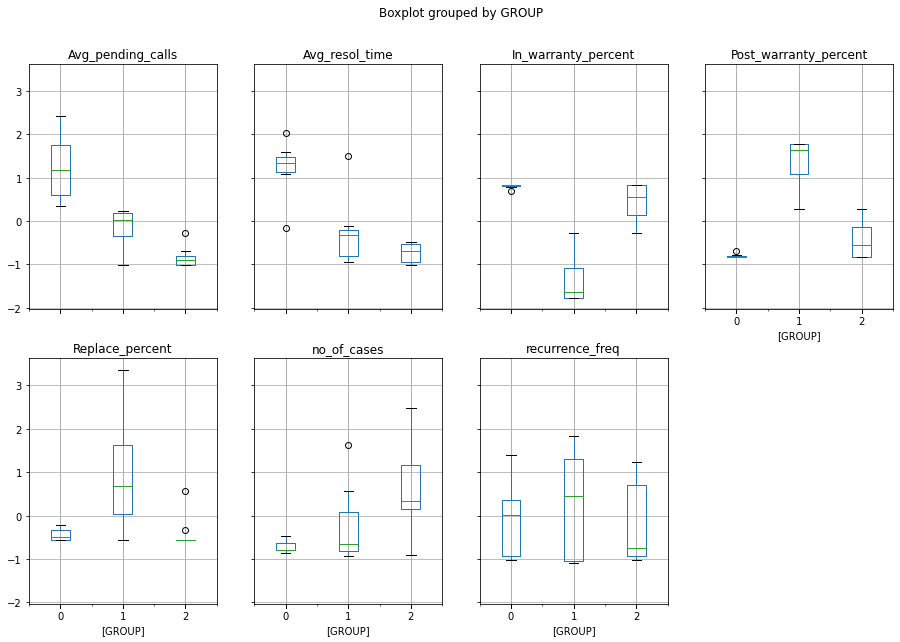

In [60]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [61]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [62]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
1,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
3,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000
4,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC59528130>,
      dtype=object)

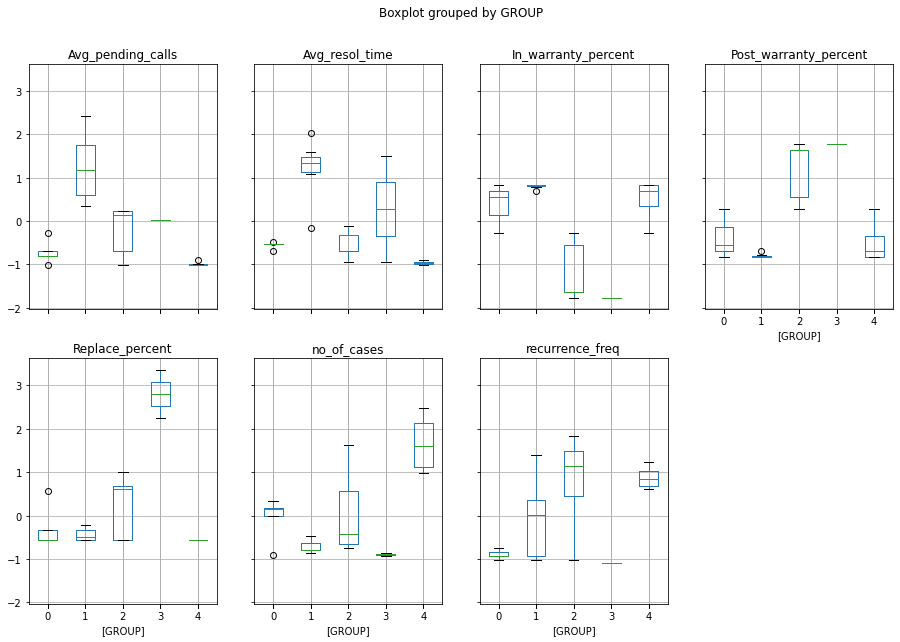

In [63]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# <a id = "link_Hierarchical"></a>Hierarchical Clustering

In [167]:
custDataAttr=custData.iloc[:,2:]
custDataAttr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [65]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


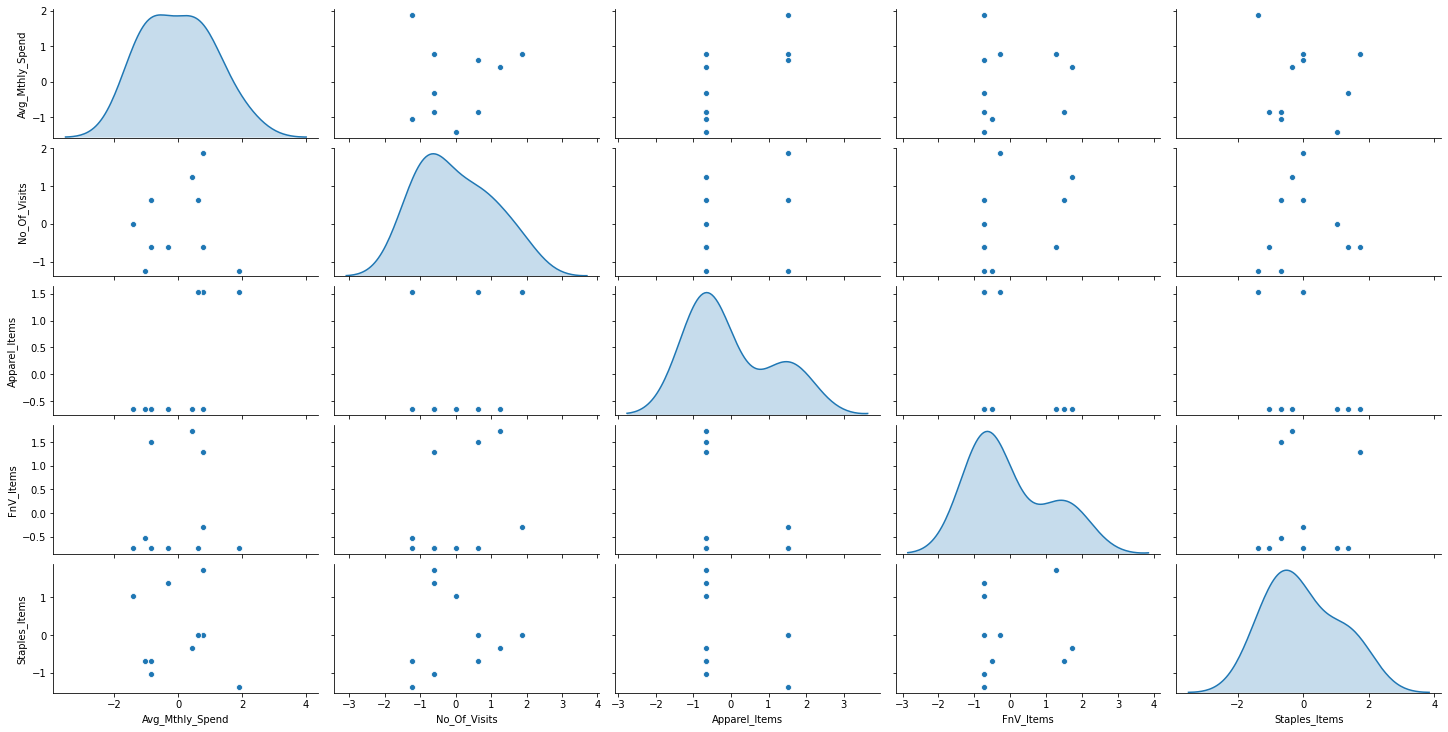

In [66]:
sns.pairplot(custDataScaled, height=2,aspect=2 , diag_kind='kde')

In [67]:
from sklearn.cluster import AgglomerativeClustering 

In [68]:
model_heir = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [69]:
model_heir.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [70]:
custDataAttr['labels'] = model_heir.labels_
custDataAttr.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [71]:
custDataAttr.groupby(["labels"]).count()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3,3,3,3,3
1,3,3,3,3,3
2,4,4,4,4,4


In [72]:
custDataClust = custDataAttr.groupby(['labels'])

In [73]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [74]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

### Cophenetic coefficient

In [166]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))
c

0.8681149436293064

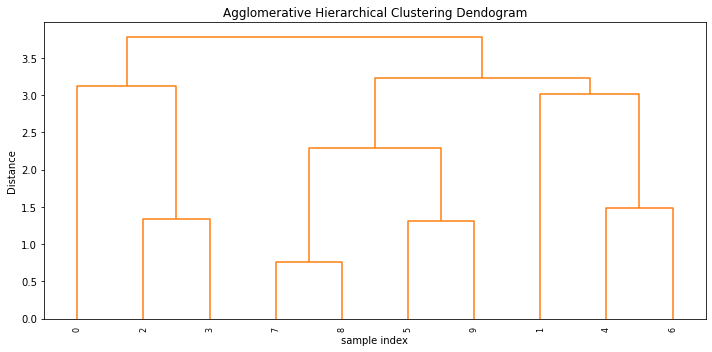

In [76]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [77]:
Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))
c

0.8453818941339526

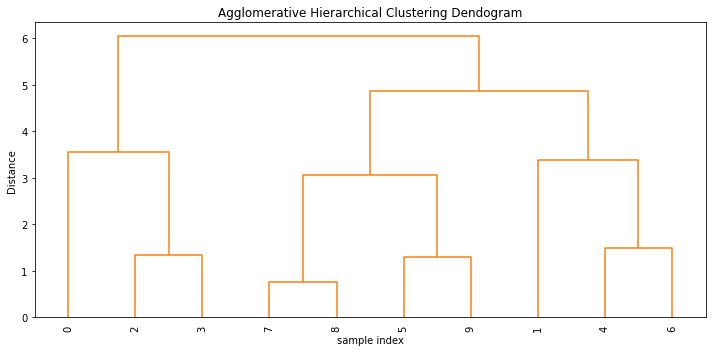

In [78]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

# <a id = "link_problem3"></a>Hierarchical Clustering- Problem 3

In [143]:
df = pd.read_csv('vehicle.csv').dropna()

In [144]:
df.shape

(813, 19)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [146]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [147]:
#Print/ Plot the dependent (categorical variable) and Check for any missing values in the data
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

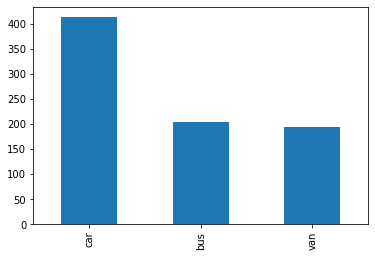

In [148]:
pd.value_counts(df["class"]).plot(kind="bar")

In [149]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

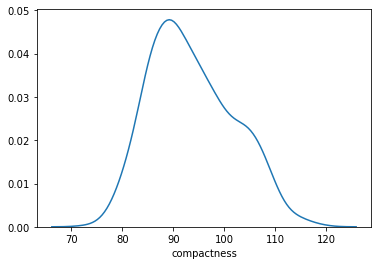

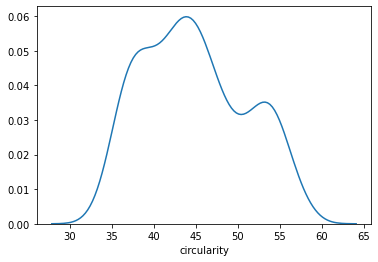

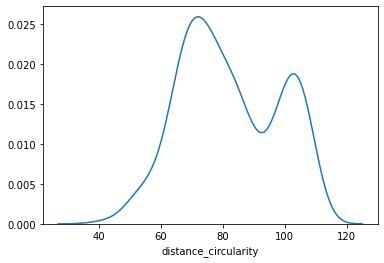

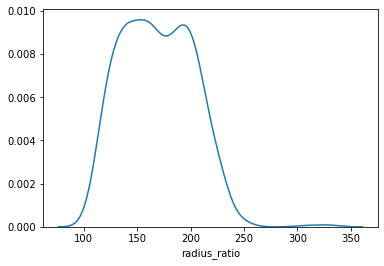

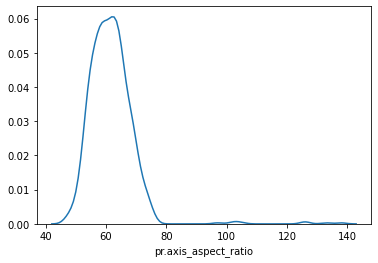

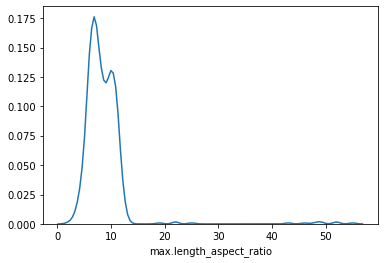

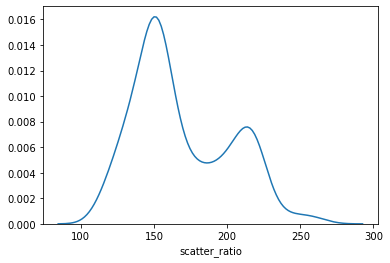

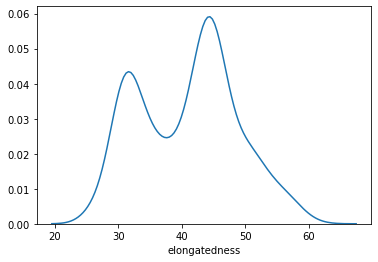

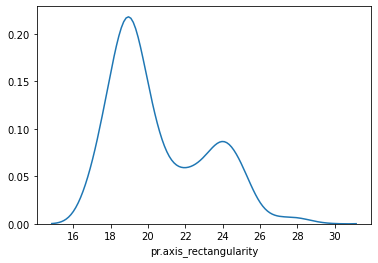

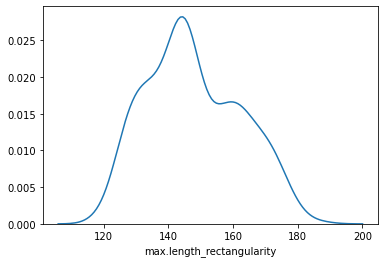

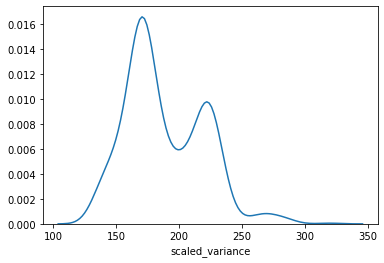

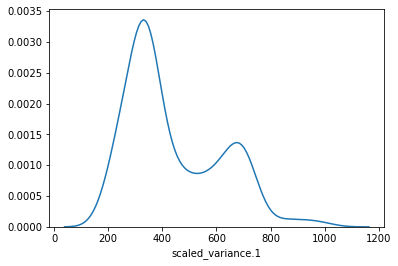

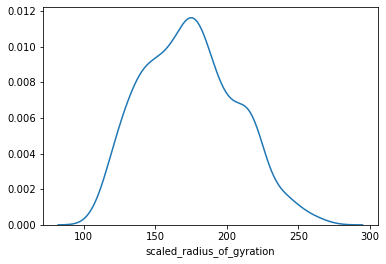

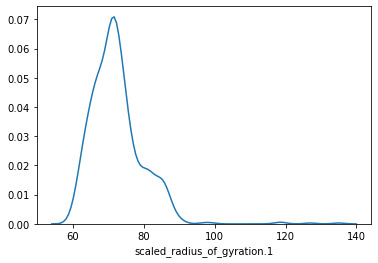

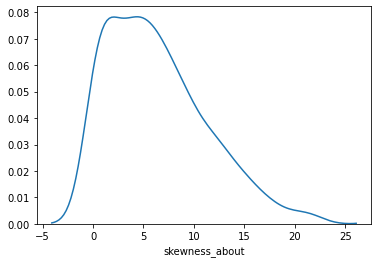

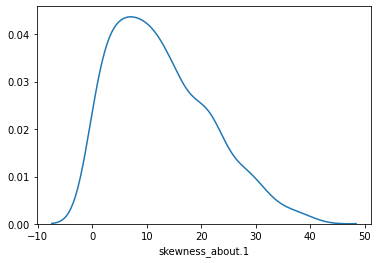

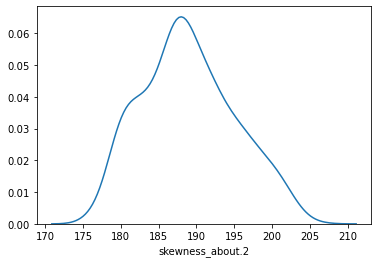

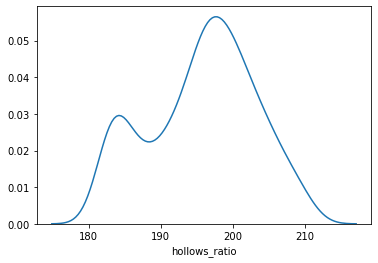

In [150]:
#KDE plot for all the features to see how many of it can show separate clusters
for i in df.columns[df.columns!='class']:
    sns.distplot(df[i],hist=False,)
    plt.show()

In [151]:
# Standardize the data
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [152]:
interest_df = df.drop('class', axis=1)

In [153]:
interest_df_z = interest_df.apply(zscore)

In [154]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [156]:
# or
# method 2
# you could use any
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)
X_std.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [157]:
#Use ward as linkage metric and distance as Eucledian
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(812, 4)

In [158]:
Z

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       ...,
       [1.60100000e+03, 1.62100000e+03, 5.12738877e+01, 2.82000000e+02],
       [1.61700000e+03, 1.62000000e+03, 5.35328071e+01, 5.31000000e+02],
       [1.62200000e+03, 1.62300000e+03, 1.07910132e+02, 8.13000000e+02]])

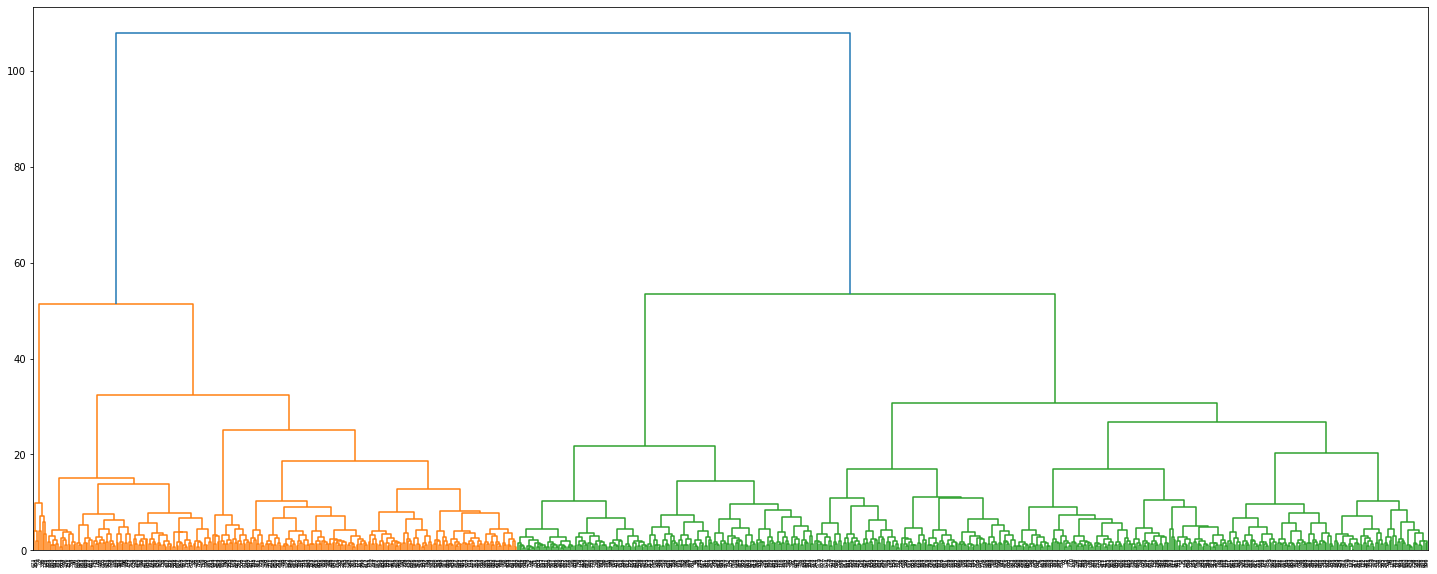

In [159]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

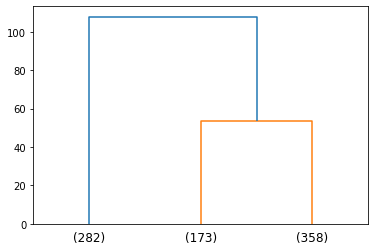

In [160]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [161]:
max_d = 52

### silhouette score 

In [162]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1,
       3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1,
       3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3,
       3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 3, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2,

In [163]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.2634332134378479

Silhouette Score is better when closer 1 and worse when closer to -1

here, it is not so great.

#### Final dendogram with 'ward linkage'

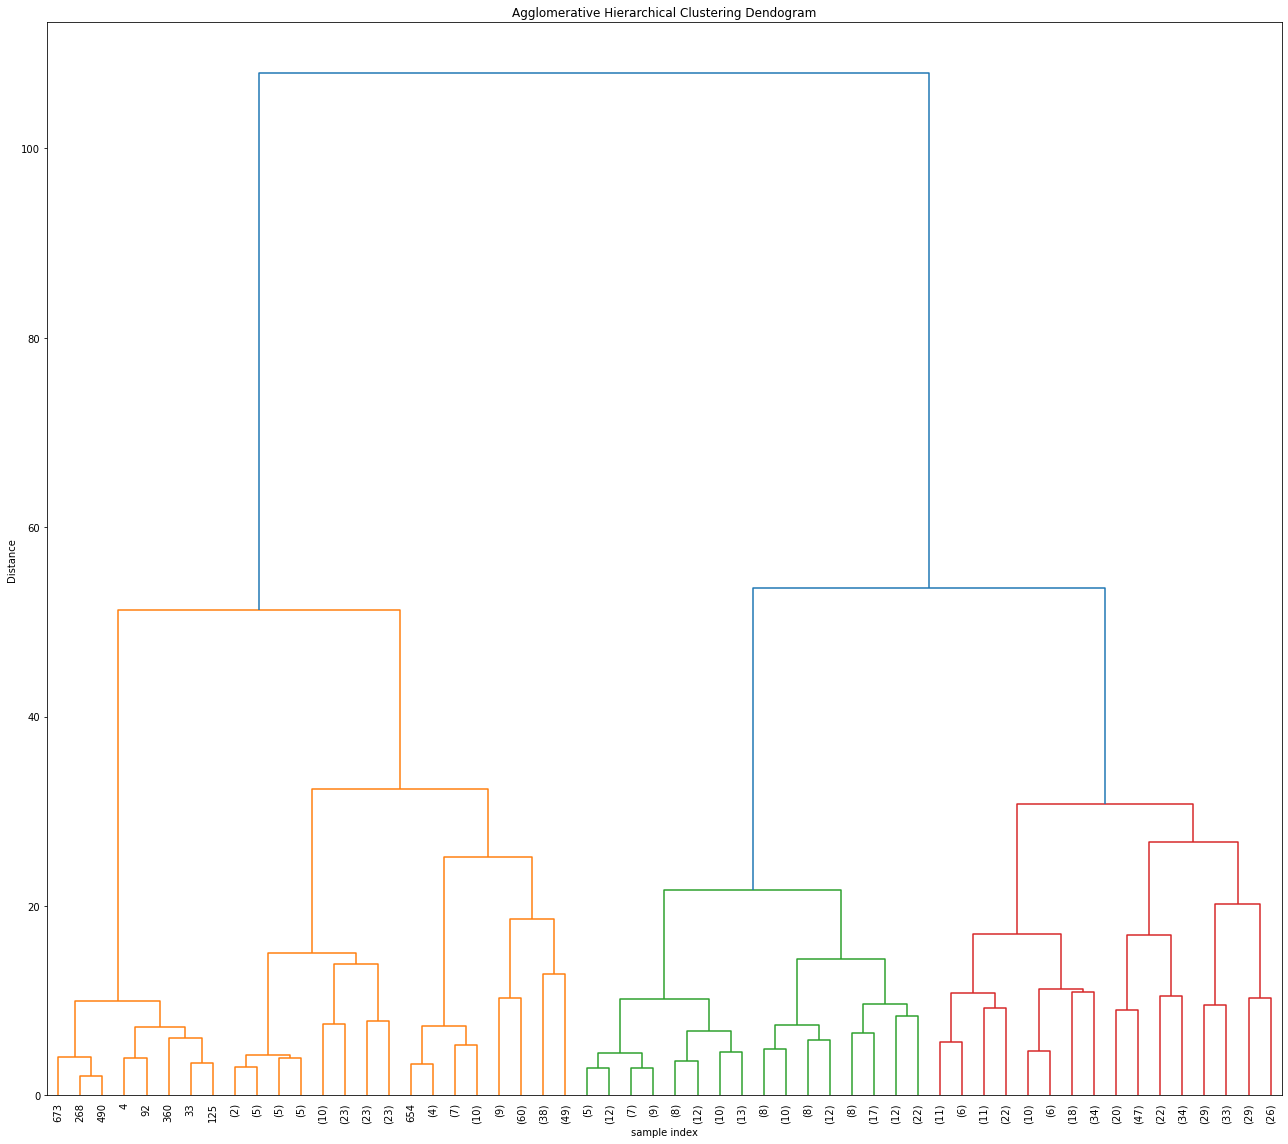

In [164]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

# <a id = "link_PCA"></a>PCA

In [79]:
cData = pd.read_csv("auto-mpg1.csv")  
cData.shape

(398, 9)

In [80]:
cData.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [81]:
data_df = pd.read_csv("bc2.csv")
data_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [82]:
data_df.shape

(699, 11)

In [83]:
data_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [84]:
# Bare nuclei is taken as object typeeven thoughit has numerical values.
data_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [85]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [86]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
data_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [87]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data_df[data_df['Bare Nuclei']=="?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [88]:
data_df[data_df['Bare Nuclei']=="?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [89]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
data_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [90]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
data_df['Bare Nuclei'].replace("?",'1', inplace=True)
data_df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [91]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')

In [92]:
# Check for duplicate data
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data_df[dups]
# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()

Number of duplicate rows = 9


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [93]:
# Remove duplicate rows
print('Number of rows before discarding duplicates = %d' % (data_df.shape[0]))
data_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (data_df.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 690


In [94]:
#Perform bi variate analysis including correlation, pairplots and state the inferences.
# Check for correlation of variable
data_df.corr(method='pearson')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


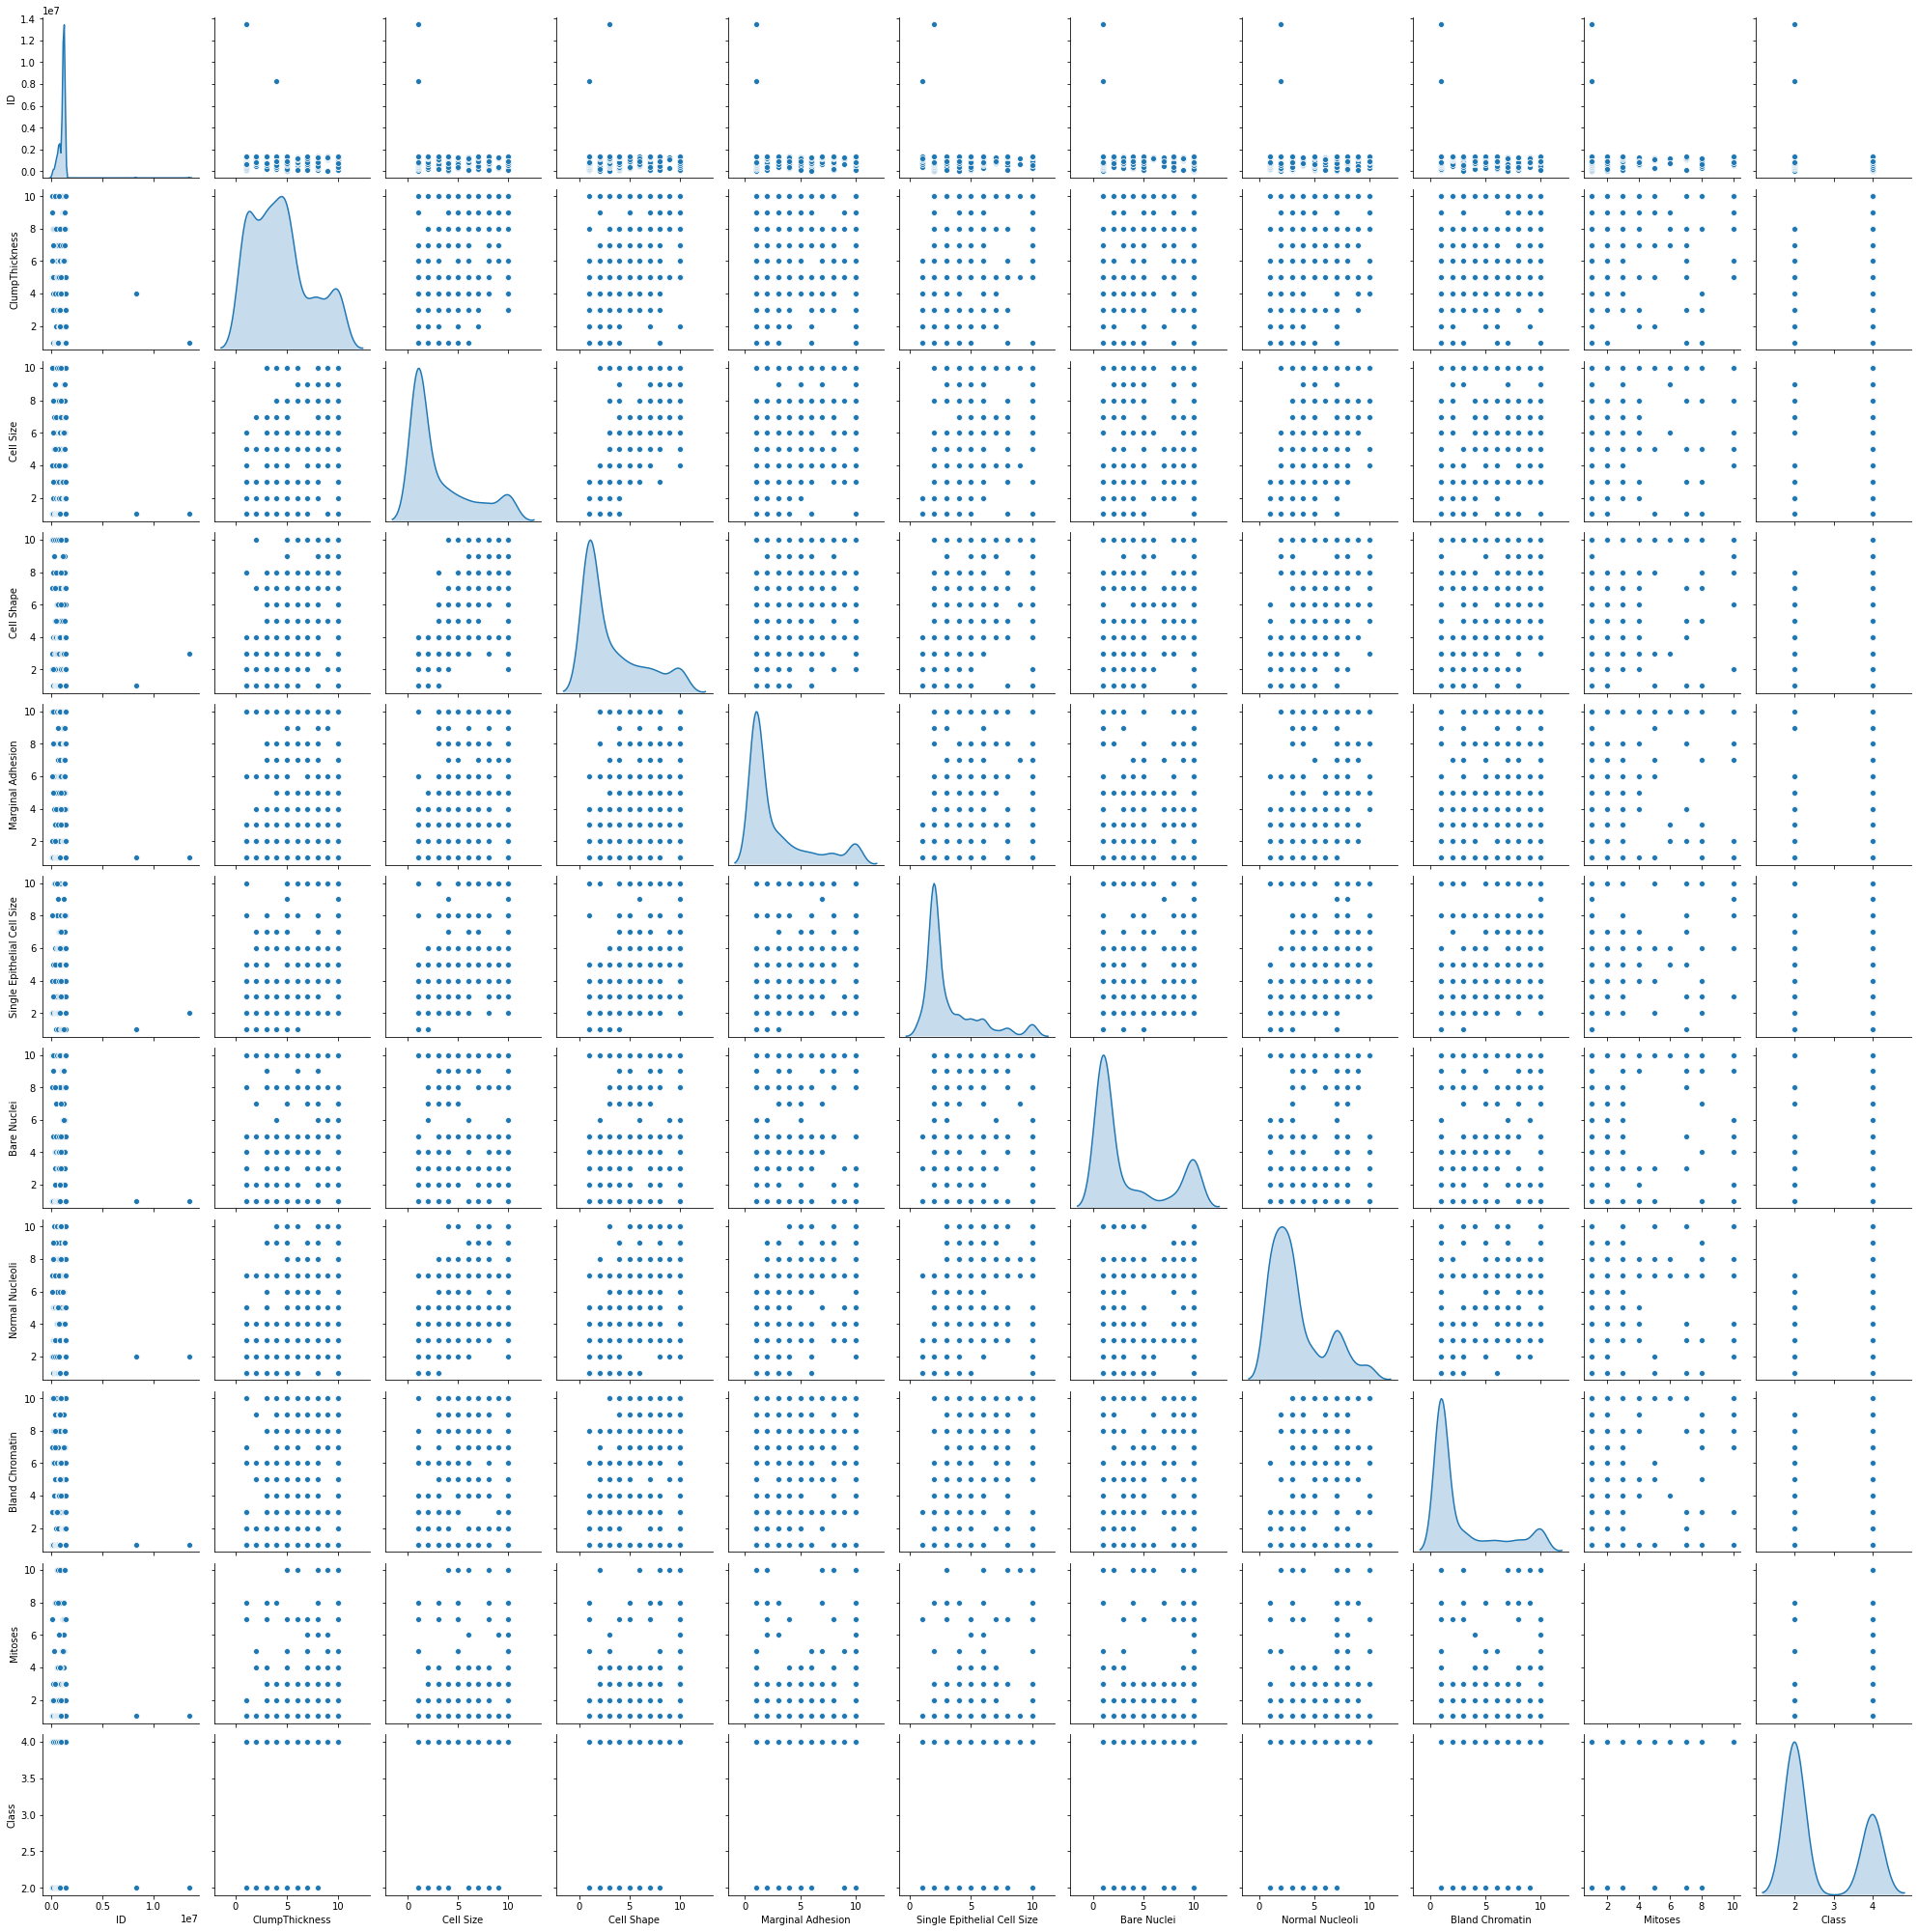

In [95]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')

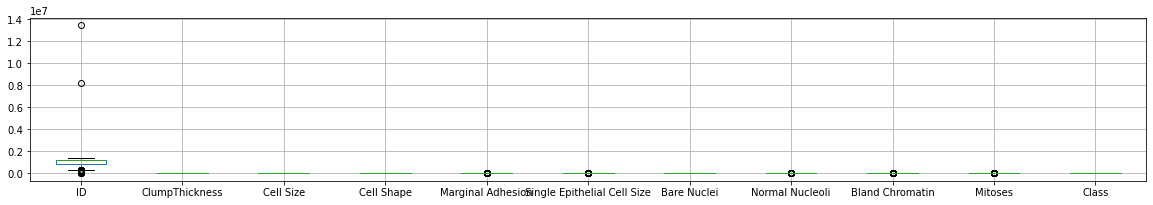

In [96]:
 #Remove any unwanted columns or outliers, standardize variables in pre-processing step
data_df.boxplot(figsize=(20,3))

In [97]:
# We could see few outliers here. Possible mode of imputation:
# Remove the outliers by taking anything above 3 sd from mean
# Take logarithmic transformation, it would reduce the variation
# Group few levels
pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [98]:
# We could see from 4 point onward we have similar pattern, and also few points. We can club the levels together
data_df['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion'] >4, 4, data_df['Marginal Adhesion'])
data_df['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [99]:
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [100]:
# Here we could see group 4 and above could be clubbed
# We could see similar patterns fro group 1 and 2, but we are not clubbing as they have sufficient number of data points
# For PCA demonstration we can leave them as it is, but if we go for modelling we should club and check for accuracy
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size'] >3, 3, data_df['Single Epithelial Cell Size'])

In [101]:
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [102]:
# Clubbing levels 4 and above together
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >4, 4, data_df['Normal Nucleoli'])

In [103]:
# Clubbing levels 4 and above together
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >4, 4, data_df['Normal Nucleoli'])

In [104]:
# Clubbing levels 4 and above together
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >4, 4, data_df['Normal Nucleoli'])

In [105]:
data_df['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] >4, 4, data_df['Bland Chromatin'])

In [106]:
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [107]:
data_df['Mitoses'] = np.where(data_df['Mitoses'] >3, 3, data_df['Mitoses'])

# We can group levels on top bracket as well.
# Also this analysis should be performed for other variables as well
# This creates greater effect on classification/regression algorithms. We are skipping here but should be explored further based
# on business requirement

In [108]:
# Drop id and class variables
data_new = data_df.drop(['ID','Class'], axis =1)
data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [109]:
#dropping/ignoring car_name  and origin
cData = cData.drop(['car name','origin'], axis=1)
cData.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [110]:
# isdigit()? on 'hp' 
hpIsDigit = pd.DataFrame(cData.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,hp,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [111]:
cData = cData.replace('?', np.nan)
cData[hpIsDigit['hp'] == False] 

,mpg,cylinders,displacement,hp,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [112]:
#instead of dropping the rows, lets replace the missing values with median value. 
cData.median()

mpg               23.0
cylinders          4.0
displacement     148.5
hp                93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [113]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['hp'] = cData['hp'].astype('float64')  # converting the hp column from object / string type to float

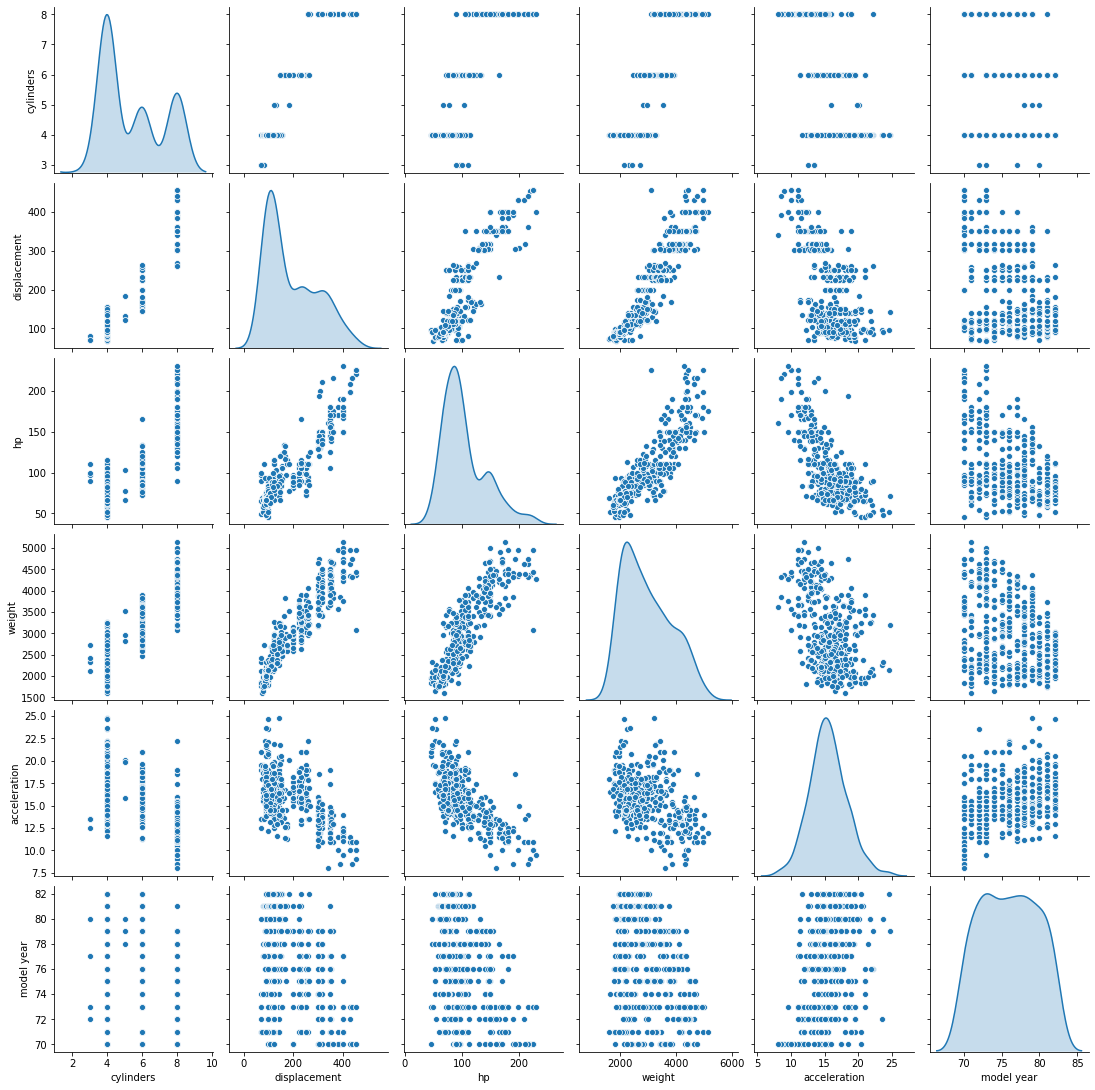

In [114]:
# independant variables
X = cData.drop(['mpg'], axis=1)
# the dependent variable
y = cData[['mpg']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [115]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,cylinders,displacement,hp,weight,acceleration,model year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [116]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [118]:
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [119]:
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


In [120]:
print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


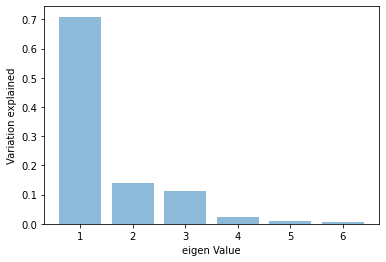

In [121]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

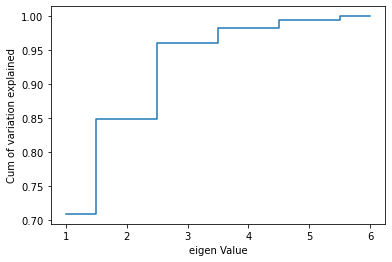

In [122]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [123]:
#Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]]
[0.70884563 0.13976166 0.11221664]


In [124]:
Xpca3

array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

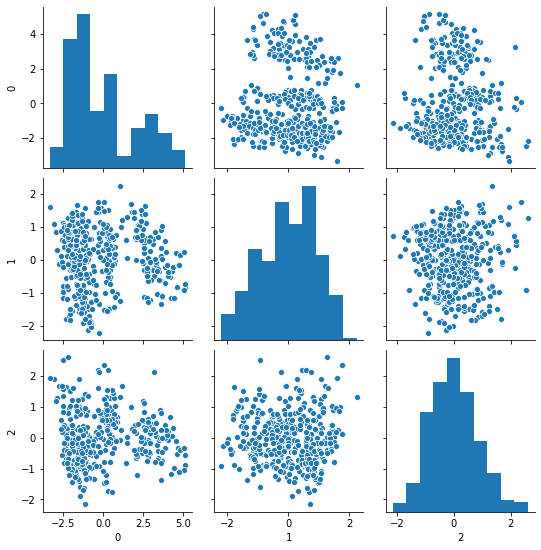

In [125]:
sns.pairplot(pd.DataFrame(Xpca3))

In [126]:
#Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.8087079552406331

In [127]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.7799909620572006

Looks like by drop reducing dimensionality by 3, we only dropped around 3% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 3 independent variables is likely to do better since that would be less of an over-fit. 

In [128]:
data_new=data_new.apply(zscore)
data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.536685,-0.686858,0.322808,-0.718310,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.161998,1.803153,0.322808,0.046557,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.536685,-0.410190,0.322808,-0.718310,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,1.161998,0.143146,0.322808,1.576291,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.536685,-0.686858,0.322808,-0.718310,-0.438024


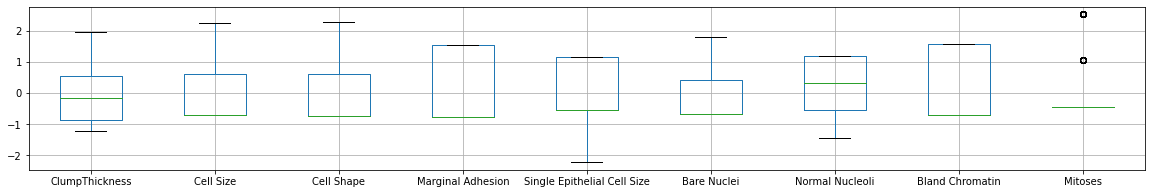

In [129]:
data_new.boxplot(figsize=(20,3))

In [130]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56876059 0.59150555
  0.54669109 0.57214901 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.69491481 0.68556472
  0.66940328 0.72684553 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.68116899 0.70518656
  0.65890363 0.71910723 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.63617971 0.69693138
  0.60427482 0.65326018 0.42473633]
 [0.56876059 0.69491481 0.68116899 0.63617971 1.00145138 0.6348984
  0.57938679 0.66617045 0.42529666]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.6348984  1.00145138
  0.64237847 0.64168219 0.45258904]
 [0.54669109 0.66940328 0.65890363 0.60427482 0.57938679 0.64237847
  1.00145138 0.65441737 0.37940435]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.66617045 0.64168219
  0.65441737 1.00145138 0.49312095]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.42529666 0.45258904
  0.37940435 0.49312095 1.00145138]]


In [131]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.3114354   0.01568016  0.02047029  0.90541669  0.07476755 -0.20399848
   0.10539206 -0.14051697 -0.06712406]
 [ 0.37194432 -0.03811526  0.7164469   0.01327345  0.0124912   0.21915718
  -0.16821058  0.49169294  0.16878882]
 [ 0.36954798 -0.07658035 -0.68846816  0.06493104 -0.12536091  0.25767414
  -0.16140193  0.50385521  0.13165607]
 [ 0.33901535 -0.15284936 -0.05474049 -0.2499106   0.50978592 -0.44868011
  -0.25095696  0.09542832 -0.5128083 ]
 [ 0.33213311 -0.10331615 -0.02823789 -0.07803192  0.19514245  0.30069671
  -0.47696574 -0.63409222  0.33772571]
 [ 0.3414089  -0.10333249  0.07794801 -0.10158408 -0.58656918  0.2695813
   0.09087582 -0.24162259 -0.61072888]
 [ 0.32338417 -0.24134232 -0.03010916 -0.18734513  0.33818548  0.18091422
   0.78876393 -0.08730706  0.15588898]
 [ 0.34571185  0.00531696  0.00642328 -0.21995643 -0.45632921 -0.66445249
   0.06545056 -0.07679928  0.41487057]
 [ 0.24940299  0.94310533 -0.03845512 -0.11612816  0.11792794  0.07297459
   0.

In [132]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.01269211  73.6623436   79.01893031  83.78090726  88.23370958
  92.45369715  95.84290092  98.98385202 100.        ]


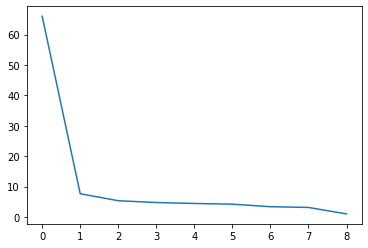

In [133]:
plt.plot(var_exp)

In [134]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 7 components here. But depending on requirement 90% variation or 5 components will also do good

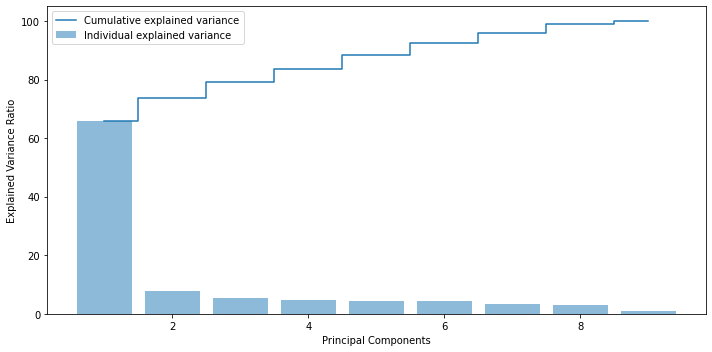

In [135]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [136]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.4041299 ,  1.80009293, -1.53091511, ...,  3.54596616,
         2.67544579,  3.01970712],
       [-0.16192711, -1.05929394, -0.20165499, ...,  0.22790085,
        -1.19958527, -1.2799403 ],
       [-0.5813698 ,  0.47119879,  0.08993856, ...,  0.59831147,
         1.06422556,  1.04843898],
       ...,
       [ 0.18622185, -1.32900516,  0.06493736, ...,  1.53630976,
         0.79160414,  0.71163103],
       [ 0.27307077,  0.79388265,  0.24009745, ..., -1.33986905,
        -0.45028227, -0.72402557],
       [ 0.12081955,  0.23487236,  0.3403235 , ...,  0.26509061,
        -0.53481417, -0.28604892]])

In [137]:
pca.components_

array([[ 0.3114354 ,  0.37194432,  0.36954798,  0.33901535,  0.33213311,
         0.3414089 ,  0.32338417,  0.34571185,  0.24940299],
       [ 0.01568016, -0.03811526, -0.07658035, -0.15284936, -0.10331615,
        -0.10333249, -0.24134232,  0.00531696,  0.94310533],
       [-0.90541669, -0.01327345, -0.06493104,  0.2499106 ,  0.07803192,
         0.10158408,  0.18734513,  0.21995643,  0.11612816],
       [ 0.10539206, -0.16821058, -0.16140193, -0.25095696, -0.47696574,
         0.09087582,  0.78876393,  0.06545056,  0.09685397],
       [-0.06712406,  0.16878882,  0.13165607, -0.5128083 ,  0.33772571,
        -0.61072888,  0.15588898,  0.41487057, -0.05684738],
       [ 0.14051697, -0.49169294, -0.50385521, -0.09542832,  0.63409222,
         0.24162259,  0.08730706,  0.07679928,  0.03925976],
       [-0.20399848,  0.21915718,  0.25767414, -0.44868011,  0.30069671,
         0.2695813 ,  0.18091422, -0.66445249,  0.07297459]])

In [138]:
#Find correlation between components and features
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311435,0.371944,0.369548,0.339015,0.332133,0.341409,0.323384,0.345712,0.249403
1,0.015680,-0.038115,-0.076580,-0.152849,-0.103316,-0.103332,-0.241342,0.005317,0.943105
2,-0.905417,-0.013273,-0.064931,0.249911,0.078032,0.101584,0.187345,0.219956,0.116128
3,0.105392,-0.168211,-0.161402,-0.250957,-0.476966,0.090876,0.788764,0.065451,0.096854
4,-0.067124,0.168789,0.131656,-0.512808,0.337726,-0.610729,0.155889,0.414871,-0.056847


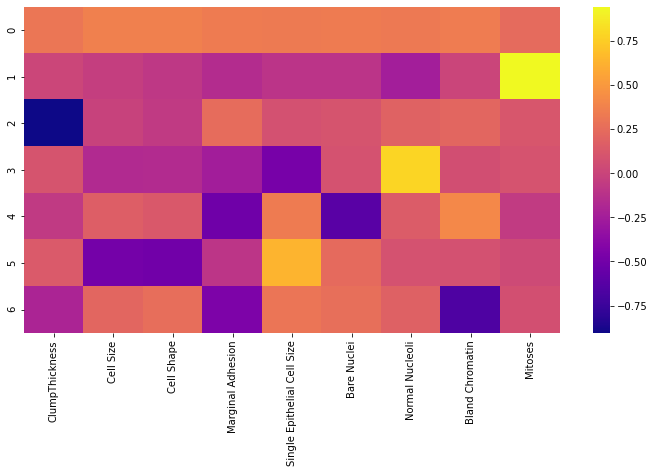

In [139]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [140]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to size and shape - We can label it as physical property
# PC1 could be labeeled with Mitoses
# Depending on relations ship, we could go ahead and label relationship with features